# Machine Learning and Quantum Alchemy: Day 4

Make sure to make jax run in double precision mode:

In [ ]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

## Exercise 01

Implement the [Lennard-Jones](https://en.wikipedia.org/wiki/Lennard-Jones_potential) potential which approximately describes a diatomic potential as function `LJ(r: float, sigma: float, epsilon: float) -> float`.

$$
  V(r)=4\varepsilon \left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]
$$

Here, $\varepsilon$ models the depth of the potential, $\sigma$ describes the position and $r$ is the distance at which the potential is evaluated.


In [ ]:
def LJ(r: float, sigma: float, epsilon: float) -> float:
  return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

## Exercise 02

Plot the potential for $\varepsilon = 1$ and $\sigma = 1$ over the interval $[0.95, 2.5]$.

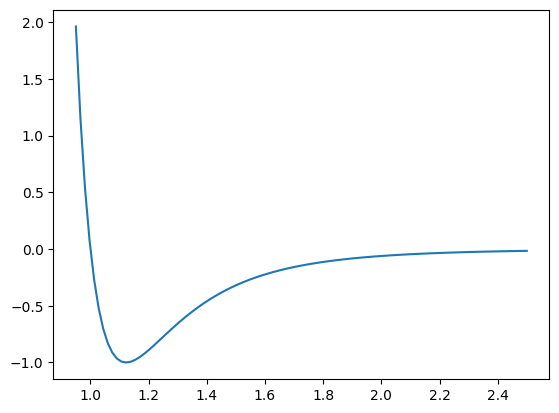

In [ ]:
import matplotlib.pyplot as plt

interval = jnp.linspace(0.95, 2.5, 100)
epsilon, sigma = 1, 1

plt.plot(interval, LJ(interval, sigma, epsilon))
plt.show()

## Exercise 03

Obtain the numerical derivative w.r.t. the distance $r$ by using finite differences for a displacement of $\delta = 10^{-5}$. Plot it.

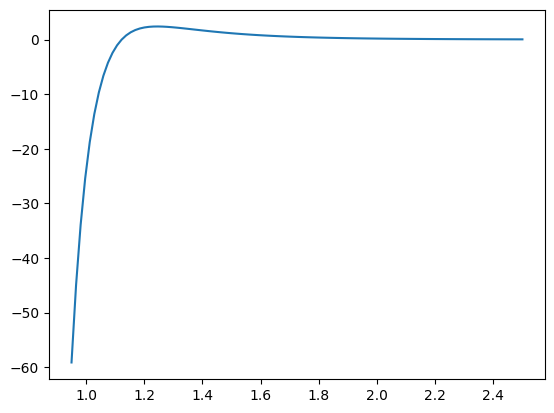

In [ ]:
def derivative(r: float, sigma: float, epsilon: float) -> float:
  delta = 1e-5

  return (LJ(r + delta, sigma, epsilon) - LJ(r, sigma, epsilon)) / delta

interval = jnp.linspace(0.95, 2.5, 100)
epsilon, sigma = 1, 1

plt.plot(interval, derivative(interval, sigma, epsilon))
plt.show()

## Exercise 04

Obtain the analytical derivative of the function by hand, implement it as `dLJ(r: float, sigma: float, epsilon: float) -> float` and plot it together with the finite difference derivative.

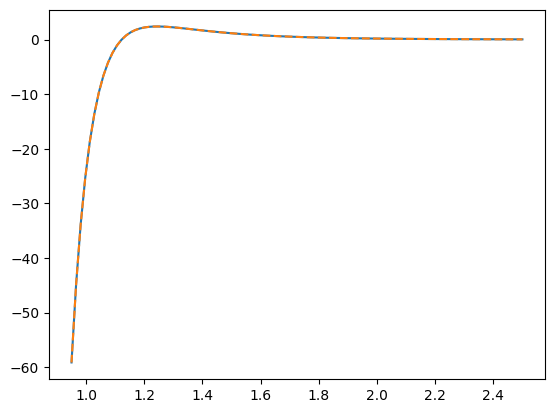

In [ ]:
def dLJ(r: float, sigma: float, epsilon: float) -> float:
  return 4 * epsilon * (-12 * (sigma ** 12 / r ** 13) + 6 * (sigma ** 6 / r ** 7))

interval = jnp.linspace(0.95, 2.5, 100)
epsilon, sigma = 1, 1

deriv_ys_1 = derivative(interval, sigma, epsilon)
deriv_ys_2 = dLJ(interval, sigma, epsilon)

plt.plot(interval, deriv_ys_1,  linestyle = '-')
plt.plot(interval, deriv_ys_2,  linestyle = '--')

plt.show()

## Exercise 05

Read the page on [automatic differentiation](https://nablachem.org/lectures/bkpy_en/autodiff/) for yourself and try some of the examples. Then use `jax.grad` to derive the function `LJ` plot the results.

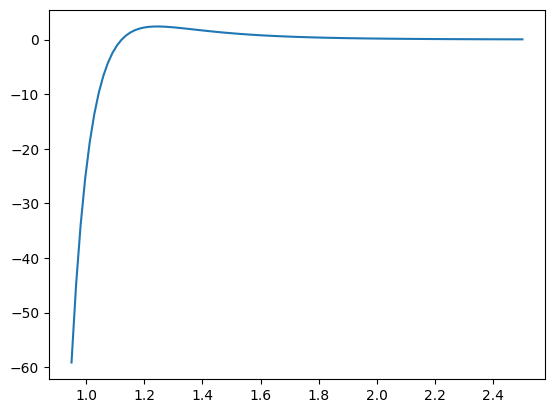

In [ ]:
df = jax.grad(LJ)

interval = jnp.linspace(0.95, 2.5, 100)
epsilon, sigma = 1, 1

ys_jax = [df(x, sigma, epsilon) for x in interval]

plt.plot(interval, ys_jax)
plt.show()

## Exercise 06

Obtain the derivative of `LJ ` for all three arguments $\varepsilon$, $\sigma$, and $r$ as well as the function value in a single `jax` call.

In [ ]:
r, epsilon, sigma = 1.0, 1.0, 1.0

value, (deriv_r, deriv_sigma, deriv_epsilon) = jax.value_and_grad(LJ, argnums=(0, 1, 2))(r, sigma, epsilon)

## Exercise 07

How can we obtain higher order derivatives?

Note that `jax` is not doing symbolic derivatives. This can be done e.g. using `sympy`.

In [ ]:
import sympy as sp

def analytical_LJ_derivative(order: int):
  r, sigma, epsilon = sp.symbols("r \sigma \epsilon")
  return sp.diff(4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6), r, order)

## Exercise 08

Different elements would be simulated with different LJ parameters. In that situation, the parameter are unified using [mixing rules](https://en.wikipedia.org/wiki/Combining_rules). Implement the Lorentz-Berthelot rules in the following code stub and plot the `jax` derivative for Ne-Ne, Ar-Ne, and Ar-Ar interactions. Make sure to call the `LJ` function you had before rather than copying the code into `energy`. For distances larger 10, the function should directly return 0.

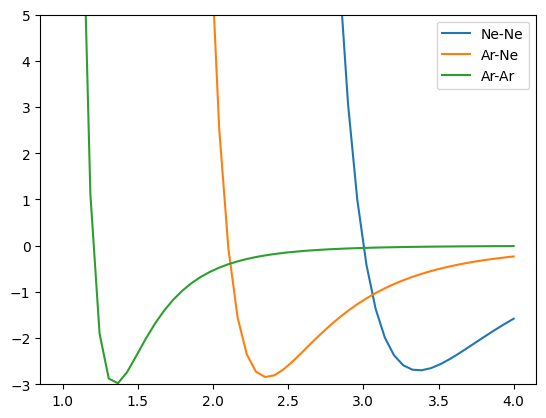

In [ ]:
def energy(element1: str, element2: str, distance: float) -> float:
  if distance > 10:
    return 0.

  table = {'Ar': (1.2, 3.), "Ne": (3., 2.7)}
  sigma1, epsilon1 = table[element1]
  sigma2, epsilon2 = table[element2]

  sigma = (sigma1 + sigma2) / 2
  epsilon = jnp.sqrt(epsilon1 * epsilon2)

  return LJ(distance, sigma, epsilon)

xs = jnp.linspace(1, 4)

ys_1 = [energy('Ne', 'Ne', x) for x in xs]
ys_2 = [energy('Ar', 'Ne', x) for x in xs]
ys_3 = [energy('Ar', 'Ar', x) for x in xs]

plt.plot(xs, ys_1, label = 'Ne-Ne')
plt.plot(xs, ys_2, label = 'Ar-Ne')
plt.plot(xs, ys_3, label = 'Ar-Ar')

plt.ylim(-3, 5)
plt.legend()
plt.show()